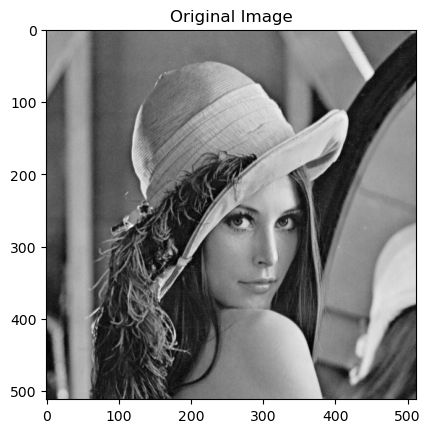

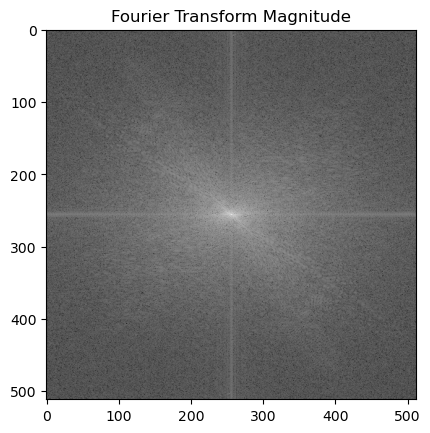

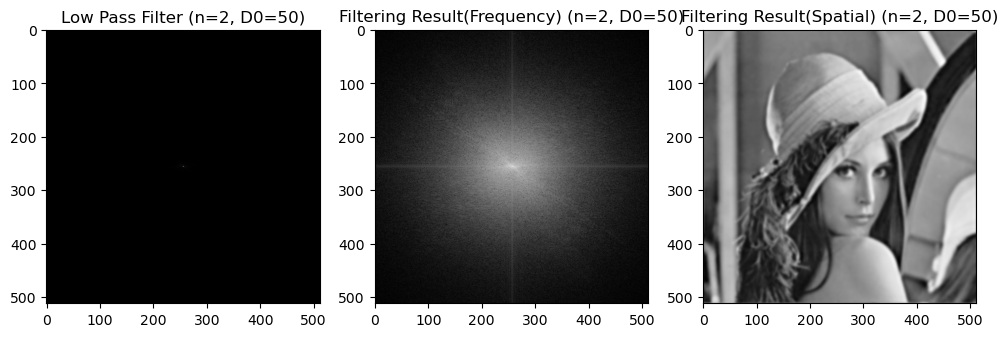

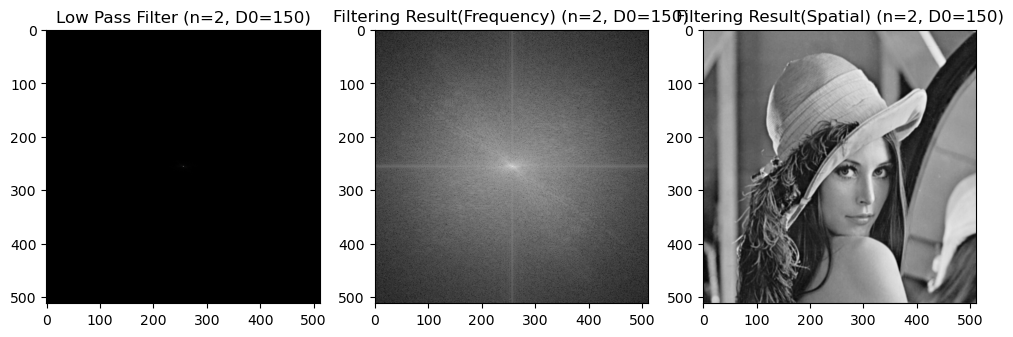

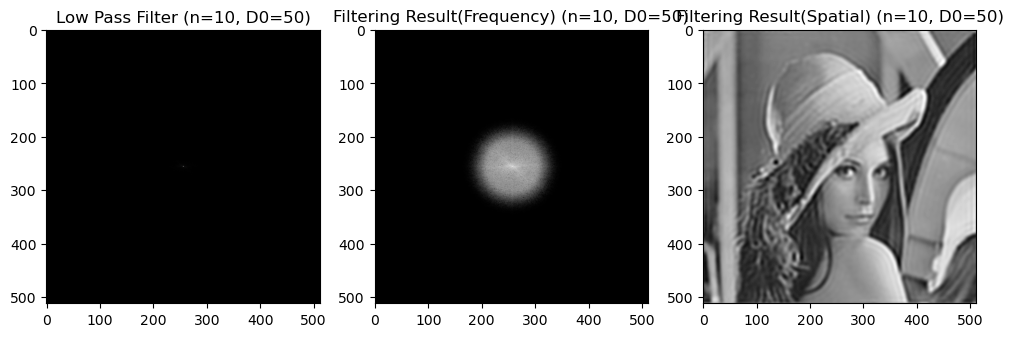

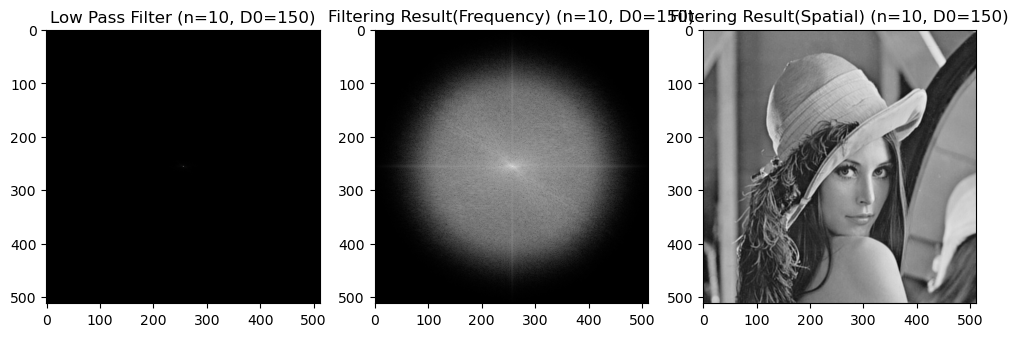

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def butterworthLowpassFilter(img, D0, n):
    h, w = img.shape
    
    # Shift the image to the center
    img_shifted = np.fft.fftshift(np.fft.fft2(img))
    
    # Create an empty filter
    H = np.zeros((h, w))
    
    for u in range(h):
        for v in range(w):
            D = np.sqrt((u - h//2)**2 + (v - w//2)**2)
            H[u, v] = 1 / (1 + (D / D0)**(2 * n))
    
    filtered_shifted = H * img_shifted
    filtered = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_shifted)))
    
    return filtered

img = cv2.imread("Lenna.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

F = np.fft.fft2(img)
F_magnitude = np.abs(np.fft.fftshift(F))
plt.imshow(np.log(1 + F_magnitude), cmap='gray')
plt.title('Fourier Transform Magnitude')
plt.show()


n_values = [2, 10]
D0_values = [50, 150]

for n in n_values:
    for D0 in D0_values:
        filtered = butterworthLowpassFilter(img, D0, n)
        filtered_shifted = np.fft.fftshift(np.fft.fft2(filtered))
        H_magnitude = np.abs(filtered_shifted)
        
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.imshow(H_magnitude, cmap='gray')
        plt.title(f'Low Pass Filter (n={n}, D0={D0})')
        plt.subplot(1, 3, 2)
        plt.imshow(np.log(1 + H_magnitude), cmap='gray')
        plt.title(f'Filtering Result(Frequency) (n={n}, D0={D0})')
        plt.subplot(1, 3, 3)
        plt.imshow(filtered, cmap='gray')
        plt.title(f'Filtering Result(Spatial) (n={n}, D0={D0})')
        plt.show()